# CIV1498 - Introduction to Data Science
## Project 2 - Is this Loan a Bad Debt or Not?!

### MOTIVATION

The US Small Business Administration (SBA) was established in 1953 with the goal of promoting and aiding small businesses in the credit market in the United States (SBA Overview and History, US Small Business Administration (2015)). Small businesses have historically been a major source of job creation in the United States thus encouraging small business formation and growth offers social advantages by providing jobs and lowering unemployment. The SBA helps these small firms by offering a loan guarantee program, which is designed to encourage banks to give small businesses loans. The SBA functions similarly to an insurance company, reducing risk for banks and small businesses by taking on some of the risk by guaranteeing a percentage of the loan. In the case that a loan goes into default, SBA then covers the amount they guaranteed. This increases the risk to the SBA however, which can sometimes make it difficult to get accepted for one of their loan programs.

Many successful start-ups, such as FedEx and Apple, have benefited from SBA loan guarantees. However, there have been reports of SBA-guaranteed loans being defaulted on by small firms and/or start-ups. The rate of default on these loans has been a source of controversy for decades. Conservative economists believe that credit markets can function effectively without the involvement of the government. Supporters of SBA guaranteed loans claim that the social advantages of small firms creating jobs significantly outweigh the costs of defaulted loans. Because SBA loans only guarantee a fraction of the total loan sum, if a small business fails on its SBA-guaranteed loan, banks will suffer some losses. Therefore, banks are still faced with a difficult choice as to whether they should grant such a loan because of the high risk of default. 

One way to inform the Bank's and SBA's decision making is through analyzing relevant historical data such as the dataset being analyzed in this project.

The goal of this notebook is to predict whether the loan applied will be a bad debt (defaulted) or not given all the data attributing to the loan, provided in the dataset being analyzed.

In [1]:
# Importing basic libraries used for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the SBA Loans Dataset
loans = pd.read_csv('SBAnational.csv')
loans.head()

LoanNr_ChkDgt                           Name          City State    Zip  \
0     1000014003                 ABC HOBBYCRAFT    EVANSVILLE    IN  47711   
1     1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS    IN  46526   
2     1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON    IN  47401   
3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW    OK  74012   
4     1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO    FL  32801   

                            Bank BankState   NAICS ApprovalDate ApprovalFY  \
0               FIFTH THIRD BANK        OH  451120    28-Feb-97       1997   
1                1ST SOURCE BANK        IN  722410    28-Feb-97       1997   
2        GRANT COUNTY STATE BANK        IN  621210    28-Feb-97       1997   
3  1ST NATL BK & TR CO OF BROKEN        OK       0    28-Feb-97       1997   
4        FLORIDA BUS. DEVEL CORP        FL       0    28-Feb-97       1997   

   ...  RevLineCr  LowDoc  ChgOffDate  DisbursementDate  DisbursementGross  \
0  ...          N       Y         NaN         28-Feb-99        $60,000.00    
1  ...          N       Y         NaN         31-May-97        $40,000.00    
2  ...          N       N         NaN         31-Dec-97       $287,000.00    
3  ...          N       Y         NaN         30-Jun-97        $35,000.00    
4  ...          N       N         NaN         14-May-97       $229,000.00    

   BalanceGross  MIS_Status ChgOffPrinGr        GrAppv      SBA_Appv  
0        $0.00        P I F       $0.00    $60,000.00    $48,000.00   
1        $0.00        P I F       $0.00    $40,000.00    $32,000.00   
2        $0.00        P I F       $0.00   $287,000.00   $215,250.00   
3        $0.00        P I F       $0.00    $35,000.00    $28,000.00   
4        $0.00        P I F       $0.00   $229,000.00   $229,000.00   

[5 rows x 27 columns]

Some basic information on the dataset,

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

#### The Data
The below table displays the description of all the variables in the dataset,

Variable Name | Data Type | Description 
---|---|---
LoanNr_ChkDgt | Text | Identifier – Primary key  
Name | Text | Borrower name 
City | Text | Borrower city 
State | Text | Borrower state 
Zip | Text | Borrower zip code  
Bank | Text | Bank name 
BankState | Text | Bank state 
NAICS | Number | North American Industry Classification System code  
ApprovalDate | Date-Time | Date SBA commitment issued 
ApprovalFY | Number | Fiscal year of commitment 
Term | Number | Loan term in months  
NoEmp | Number | Number of business employees  
NewExist | Number | 1 = Existing business, 2 = New business
CreateJob | Number | Number of jobs created  
RetainedJob | Number | Number of jobs retained  
FranchiseCode | Number | Franchise code, (00000 or 00001) = No franchise  
UrbanRural | Number | 1 = Urban, 2 = rural, 0 = undefined  
RevLineCr | Text | Revolving line of credit: Y = Yes, N = No 
LowDoc | Text | LowDoc Loan Program: Y = Yes, N = No 
ChgOffDate | Date-Time | The date when a loan is declared to be in default 
DisbursementDate | Date-Time | Disbursement date 
DisbursementGross | Currency | Amount disbursed 
BalanceGross | Currency | Gross amount outstanding 
MIS_Status | Text | Loan status charged off = CHGOFF, Paid in full = PIF 
ChgOffPrinGr | Currency | Charged-off amount 
GrAppv | Currency | Gross amount of loan approved by bank 
SBA_Appv | Currency | SBA’s guaranteed amount of approved loan 

### Pre-Processing / Feature Engineering

Let's checkout the null values in the dataset,

In [4]:
loans.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

The columns 'ChgOffDate' is insignificant as the focus of the analysis is to predict whether a loan gets charged off (defaults) rather then when it happens, but the null values in other variables needs to be processed.

An appropriate approach would be to remove the rows with null values entirely rather than imputing because the # of records in the dataset is very large to work with and it's difficult to come up with an imputing technique given the nature of the information (for instance, it would be wrong to a just assume whether a businessis new or existing as this has the potential to be a very significant feature in classifying the loan)

In [5]:
# Dropping null values from the columns as inspected above
loans.dropna(subset = ['Name', 'City', 'State', 
                       'BankState', 'NewExist', 'RevLineCr', 
                       'LowDoc', 'DisbursementDate', 'MIS_Status'], inplace = True)

loans.isnull().sum()

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           725369
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

Let's inspect the data types of all the columns in the dataset,

In [6]:
# Checking Data Type of each feature
loans.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

The Data Type of some columns needs to be changed as appropriated by the description table

In [7]:
loans = loans.astype({'Zip': 'str', 'NewExist': 'int64', 'UrbanRural': 'str'})

The columns involving currency are currently being read as an object data type

In [8]:
currency_cols = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
loans[currency_cols].head()

DisbursementGross BalanceGross ChgOffPrinGr        GrAppv      SBA_Appv
0       $60,000.00        $0.00        $0.00    $60,000.00    $48,000.00 
1       $40,000.00        $0.00        $0.00    $40,000.00    $32,000.00 
2      $287,000.00        $0.00        $0.00   $287,000.00   $215,250.00 
3       $35,000.00        $0.00        $0.00    $35,000.00    $28,000.00 
4      $229,000.00        $0.00        $0.00   $229,000.00   $229,000.00

The values contain ('$' & ','), these characters are to be removed in order to convert the values to a float data type

In [9]:
# Replacing '$' and ',' with white spaces 
for col in currency_cols:
    loans[col] = loans[col].str.replace('$', '')
    loans[col] = loans[col].str.replace(',', '')

# Converting the Data Type to 'float64'
loans[currency_cols] = loans[currency_cols].astype('float64')

loans[currency_cols].head()

DisbursementGross  BalanceGross  ChgOffPrinGr    GrAppv  SBA_Appv
0            60000.0           0.0           0.0   60000.0   48000.0
1            40000.0           0.0           0.0   40000.0   32000.0
2           287000.0           0.0           0.0  287000.0  215250.0
3            35000.0           0.0           0.0   35000.0   28000.0
4           229000.0           0.0           0.0  229000.0  229000.0

#### NAICS codes
The first two digits of the NAICS codes refer to the industry each business belongs to, whereas each additional digit addresses the hierarchy in which the specific type of business falls in. The below table depicts the mapping of the first two digits corresponding to the general industry class.

NAICS Code | Industry Class
---|---
11 | Agriculture, forestry, fishing and hunting
21 | Mining, quarrying, and oil and gas extraction
22 | Utilities
23 | Construction
31–33 | Manufacturing
42 | Wholesale trade
44–45 | Retail trade
48–49 | Transportation and warehousing
51 | Information
52 | Finance and insurance
53 | Real estate and rental and leasing
54 | Professional, scientific, and technical services
55 | Management of companies and enterprises
56 | Administrative and support and waste management and remediation services
61 | Educational services
62 | Health care and social assistance
71 | Arts, entertainment, and recreation
72 | Accommodation and food services
81 | Other services (except public administration) 
92 | Public administration

In [10]:
list(loans['NAICS'])

[451120,
 722410,
 621210,
 0,
 0,
 332721,
 0,
 811118,
 721310,
 0,
 811111,
 235950,
 445299,
 0,
 0,
 421330,
 0,
 0,
 0,
 0,
 0,
 624410,
 0,
 0,
 722211,
 451110,
 0,
 0,
 611110,
 445310,
 238140,
 621210,
 532490,
 454210,
 541611,
 0,
 0,
 0,
 453110,
 311611,
 0,
 0,
 332996,
 0,
 0,
 0,
 235930,
 0,
 0,
 441120,
 621310,
 235510,
 722410,
 621210,
 448130,
 0,
 0,
 332911,
 236115,
 512110,
 713930,
 541810,
 315212,
 0,
 0,
 314999,
 448120,
 444220,
 0,
 541940,
 811111,
 621210,
 0,
 311812,
 0,
 0,
 0,
 423710,
 524128,
 213112,
 514199,
 0,
 0,
 453910,
 323117,
 0,
 0,
 0,
 0,
 561612,
 0,
 0,
 422720,
 422810,
 541810,
 0,
 451120,
 421940,
 0,
 0,
 0,
 454311,
 445310,
 445310,
 0,
 0,
 451220,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 441222,
 0,
 453110,
 0,
 451120,
 445230,
 0,
 0,
 722110,
 621210,
 0,
 421310,
 722211,
 722410,
 421110,
 722310,
 811111,
 233210,
 0,
 0,
 0,
 0,
 235310,
 0,
 0,
 0,
 0,
 0,
 713940,
 441120,
 541310,
 334113,
 0,
 541940,
 0,
 0,
 0,
 5

It seems there are entries with NAICS code as zero, similar to null values, these entries needs to be dropped from the data set as well

In [11]:
loans.shape

(886240, 27)

In [12]:
# Dropping the entries with NAICS == 0
loans = loans[loans['NAICS'] != 0]
loans.shape

(687973, 27)

Since the focus is only on the first two digits of the NAICS code which corresponds to the General Industry Type, let's convert the column appropriately and then add a new column for Industry Class

In [13]:
# Selecting only the first two digits of the NAICS code
loans['Industry'] = loans['NAICS'].astype('str').apply(lambda s : s[:2])

# Mapping the code to the industry type as per the NAICS code table above
loans['Industry'] = loans['Industry'].map({'11': 'Ag/For/Fish/Hunt',
                                           '21': 'Min/Quar/Oil_Gas_ext',
                                           '22': 'Utilities',
                                           '23': 'Construction',
                                           '31': 'Manufacturing',
                                           '32': 'Manufacturing',
                                           '33': 'Manufacturing',
                                           '42': 'Wholesale_trade',
                                           '44': 'Retail_trade',
                                           '45': 'Retail_trade',
                                           '48': 'Trans/Ware',
                                           '49': 'Trans/Ware',
                                           '51': 'Information',
                                           '52': 'Finance/Insurance',
                                           '53': 'RE/Rental/Lease',
                                           '54': 'Prof/Science/Tech',
                                           '55': 'Mgmt_comp',
                                           '56': 'Admin_sup/Waste_Mgmt_Rem',
                                           '61': 'Educational',
                                           '62': 'Healthcare/Social_assist',
                                           '71': 'Arts/Entertain/Rec',
                                           '72': 'Accom/Food_serv',
                                           '81': 'Other_no_pub',
                                           '92': 'Public_Admin'})
loans.head()

LoanNr_ChkDgt                            Name         City State    Zip  \
0     1000014003                  ABC HOBBYCRAFT   EVANSVILLE    IN  47711   
1     1000024006     LANDMARK BAR & GRILLE (THE)    NEW PARIS    IN  46526   
2     1000034009           WHITLOCK DDS, TODD M.  BLOOMINGTON    IN  47401   
5     1000084002  B&T SCREW MACHINE COMPANY, INC   PLAINVILLE    CT   6062   
7     1000094005                 WEAVER PRODUCTS  SUMMERFIELD    FL  34491   

                            Bank BankState   NAICS ApprovalDate ApprovalFY  \
0               FIFTH THIRD BANK        OH  451120    28-Feb-97       1997   
1                1ST SOURCE BANK        IN  722410    28-Feb-97       1997   
2        GRANT COUNTY STATE BANK        IN  621210    28-Feb-97       1997   
5  TD BANK, NATIONAL ASSOCIATION        DE  332721    28-Feb-97       1997   
7                   REGIONS BANK        AL  811118    28-Feb-97       1997   

   ...  LowDoc  ChgOffDate  DisbursementDate  DisbursementGross  BalanceGross  \
0  ...       Y         NaN         28-Feb-99            60000.0           0.0   
1  ...       Y         NaN         31-May-97            40000.0           0.0   
2  ...       N         NaN         31-Dec-97           287000.0           0.0   
5  ...       N         NaN         30-Jun-97           517000.0           0.0   
7  ...       Y         NaN         30-Jun-98            45000.0           0.0   

   MIS_Status ChgOffPrinGr    GrAppv  SBA_Appv                  Industry  
0       P I F          0.0   60000.0   48000.0              Retail_trade  
1       P I F          0.0   40000.0   32000.0           Accom/Food_serv  
2       P I F          0.0  287000.0  215250.0  Healthcare/Social_assist  
5       P I F          0.0  517000.0  387750.0             Manufacturing  
7       P I F          0.0   45000.0   36000.0              Other_no_pub  

[5 rows x 28 columns]

The next variable of interest is <b>'FranchiseCode'</b>. The type of franchise is insignificant to the analysis but the fact whether a business is a franchise or not is of relevance. Let's add a binary column for whether a business is a franchise or not

In [14]:
list(loans['FranchiseCode'].unique())

[1,
 15100,
 10656,
 21425,
 3490,
 77175,
 50949,
 20550,
 78760,
 84025,
 10676,
 10397,
 23997,
 51570,
 70405,
 81612,
 36002,
 16920,
 50564,
 67759,
 81965,
 39598,
 75982,
 90725,
 9802,
 78325,
 401,
 40472,
 73675,
 17998,
 39700,
 21420,
 79140,
 68021,
 65925,
 71456,
 10622,
 8380,
 44081,
 6410,
 52000,
 83882,
 10734,
 38510,
 77174,
 89769,
 10556,
 42520,
 68020,
 45455,
 66910,
 9800,
 27765,
 65140,
 85100,
 64985,
 53250,
 75710,
 50040,
 62343,
 35706,
 52956,
 55120,
 36680,
 3515,
 61400,
 46413,
 1350,
 9050,
 49952,
 68150,
 50028,
 4516,
 84535,
 35300,
 56837,
 45479,
 46408,
 20728,
 10729,
 10528,
 66690,
 10691,
 62753,
 75900,
 35705,
 61900,
 82360,
 8047,
 10200,
 68060,
 34459,
 15668,
 19118,
 90900,
 67750,
 43351,
 65160,
 70651,
 8015,
 30210,
 48450,
 8045,
 43579,
 10605,
 46885,
 67550,
 17750,
 9202,
 20487,
 0,
 65150,
 35635,
 55512,
 30233,
 65145,
 70554,
 10465,
 1493,
 36260,
 56885,
 10603,
 50140,
 59883,
 52018,
 48000,
 25650,
 36355,


In [15]:
# Adding a binary columns for whether a business is a franchise or not
# According to Variable Description Franchise Code = (00000 or 00001) means no franchise
loans['Franchise'] = np.where(loans.FranchiseCode <= 1, 0, 1)

loans.head()

LoanNr_ChkDgt                            Name         City State    Zip  \
0     1000014003                  ABC HOBBYCRAFT   EVANSVILLE    IN  47711   
1     1000024006     LANDMARK BAR & GRILLE (THE)    NEW PARIS    IN  46526   
2     1000034009           WHITLOCK DDS, TODD M.  BLOOMINGTON    IN  47401   
5     1000084002  B&T SCREW MACHINE COMPANY, INC   PLAINVILLE    CT   6062   
7     1000094005                 WEAVER PRODUCTS  SUMMERFIELD    FL  34491   

                            Bank BankState   NAICS ApprovalDate ApprovalFY  \
0               FIFTH THIRD BANK        OH  451120    28-Feb-97       1997   
1                1ST SOURCE BANK        IN  722410    28-Feb-97       1997   
2        GRANT COUNTY STATE BANK        IN  621210    28-Feb-97       1997   
5  TD BANK, NATIONAL ASSOCIATION        DE  332721    28-Feb-97       1997   
7                   REGIONS BANK        AL  811118    28-Feb-97       1997   

   ...  ChgOffDate  DisbursementDate  DisbursementGross  BalanceGross  \
0  ...         NaN         28-Feb-99            60000.0           0.0   
1  ...         NaN         31-May-97            40000.0           0.0   
2  ...         NaN         31-Dec-97           287000.0           0.0   
5  ...         NaN         30-Jun-97           517000.0           0.0   
7  ...         NaN         30-Jun-98            45000.0           0.0   

   MIS_Status  ChgOffPrinGr    GrAppv  SBA_Appv                  Industry  \
0       P I F           0.0   60000.0   48000.0              Retail_trade   
1       P I F           0.0   40000.0   32000.0           Accom/Food_serv   
2       P I F           0.0  287000.0  215250.0  Healthcare/Social_assist   
5       P I F           0.0  517000.0  387750.0             Manufacturing   
7       P I F           0.0   45000.0   36000.0              Other_no_pub   

  Franchise  
0         0  
1         0  
2         0  
5         0  
7         0  

[5 rows x 29 columns]

Next let's look at whether the business is a new business or an existing business as this has the potential to affect the decision of banks or SBA in assessing the loan application. According to the Variable Description, '1' = Existing business and '2' = New business, so let's check the unique values in the 'NewExist' column

In [16]:
list(loans['NewExist'])

[2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,


In [17]:
loans['NewExist'].unique()

array([2, 1, 0])

Similar to null values, the records with 'NewExist' = 0 need to be dropped, further let's convert the column into a binary column with '0' = Existing Business and '1' = New Business

In [18]:
# Dropping records with 'NewExist' = 0
loans = loans[loans['NewExist'] != 0]

# Converting 'NewExist' to a binary columns as explained above
loans['NewExist'] = loans['NewExist'].replace([2, 1], [1, 0])

loans['NewExist'].unique()

array([1, 0])

Another set of variables that can be converted to binary variables are 'RevLineCr' and 'LowDoc'. 

'RevLineCr' indicates whether the business has a revolving line of credit or not. 

'LowDoc' indicates whether the loan application comes under the "LowDoc Loan" Program or not, in simple terms, to process more loans efficiently, a “LowDoc Loan” program was implemented where loans under $150,000 can be processed using a one-page application. “Yes” indicates loans with a one-page application, and “No” indicates loans with more information attached to the application.

Let's change them to binary columns

In [19]:
#Checking Unique Values for columns 'RevLineCr' and 'LowDoc'
print(loans['RevLineCr'].unique(), '\n')
print(loans['LowDoc'].unique(), '\n')

['N' 'Y' '0' 'T' '`' ',' '1' 'C' '2' 'R' '7' 'A' '-' 'Q'] 

['Y' 'N' 'C' '1' 'S' 'R' 'A' '0'] 



Values other than 'Y' & 'N' should be treated similar to null values or missing entries, let's filter out the data accordingly

In [20]:
# Filtering Data for erratic entries
loans = loans[(loans['RevLineCr'] == 'Y') | (loans['RevLineCr'] == 'N')]
loans = loans[(loans['LowDoc'] == 'Y') | (loans['LowDoc'] == 'N')]

#Converting columns to binary features
loans['RevLineCr'] = np.where(loans['RevLineCr'] == 'Y', 1, 0)
loans['LowDoc'] = np.where(loans['LowDoc'] == 'Y', 1, 0)

print(loans['RevLineCr'].unique(), '\n')
print(loans['LowDoc'].unique(), '\n')

[0 1] 

[1 0] 



#### Date-Time Features

Next, Let's attack the Date-Time features

In [21]:
loans[['ApprovalFY', 'ApprovalDate', 'DisbursementDate']].head()

ApprovalFY ApprovalDate DisbursementDate
0       1997    28-Feb-97        28-Feb-99
1       1997    28-Feb-97        31-May-97
2       1997    28-Feb-97        31-Dec-97
5       1997    28-Feb-97        30-Jun-97
7       1997    28-Feb-97        30-Jun-98

In [22]:
loans[['ApprovalFY', 'ApprovalDate', 'DisbursementDate']].dtypes

ApprovalFY          object
ApprovalDate        object
DisbursementDate    object
dtype: object

<b>'ApprovalFY'</b> is the fiscal <b>year</b> of commitment and should be an integer instead of an object

In [23]:
loans['ApprovalFY'].unique()

array([1997, 2006, 1998, 1999, 2000, 2001, 2003, 2004, 2005, 1984, 2007,
       1987, 2008, 1988, 2009, 1989, 1990, 2010, 1991, 2011, 1992, 2002,
       2012, 1993, 2013, 1994, 2014, '2004', '1994', '1995', '2005',
       '1996', 1996], dtype=object)

It seems there is a mix of integer and string values in the columns, let's convert the column to integer data type

In [24]:
# Converting the Data Type to 'int64'
loans['ApprovalFY'] = loans['ApprovalFY'].astype('str').str.extract('(\d+)').astype('int64')

loans['ApprovalFY'].unique()

array([1997, 2006, 1998, 1999, 2000, 2001, 2003, 2004, 2005, 1984, 2007,
       1987, 2008, 1988, 2009, 1989, 1990, 2010, 1991, 2011, 1992, 2002,
       2012, 1993, 2013, 1994, 2014, 1995, 1996])

In [25]:
# Converting the Data Type from object to Date-Time object for Date-Time Features
loans['ApprovalDate'] = pd.to_datetime(loans['ApprovalDate'])
loans['DisbursementDate'] = pd.to_datetime(loans['DisbursementDate'])
loans[['ApprovalDate', 'DisbursementDate']].head()

ApprovalDate DisbursementDate
0   1997-02-28       1999-02-28
1   1997-02-28       1997-05-31
2   1997-02-28       1997-12-31
5   1997-02-28       1997-06-30
7   1997-02-28       1998-06-30

One feature that would be interesting to consider is the number of days between the loan approval date and the loan disbursement date. Assumed hypothesis is that the time it took for the business to recieve funds could have a relationship with the business' ability to repay the loan, many times it happens that a business needs the loan funding unrgently to keep the business alive. This could vary from industry to industry. Let's engineer a feature 'DaysToDisbursement' which depicts the time difference in days between the loan approval date and the loan disbursement date.

In [26]:
#Creating 'DaysToDisbursement' as explained above
loans['DaysToDisbursement'] = loans['DisbursementDate'] - loans['ApprovalDate']

# Changing 'DaysToDisbursement' to an integer data type
loans['DaysToDisbursement'] = loans['DaysToDisbursement'].astype('str').str.split(expand = True).drop(columns = [1])
loans['DaysToDisbursement'] = loans['DaysToDisbursement'].astype('int64')

loans[['ApprovalFY', 'ApprovalDate', 'DisbursementDate', 'DaysToDisbursement']].head()

ApprovalFY ApprovalDate DisbursementDate  DaysToDisbursement
0        1997   1997-02-28       1999-02-28                 730
1        1997   1997-02-28       1997-05-31                  92
2        1997   1997-02-28       1997-12-31                 306
5        1997   1997-02-28       1997-06-30                 122
7        1997   1997-02-28       1998-06-30                 487

In [27]:
#Sanity Check : Remove entries with negative 'DaysToDisbursement'
loans = loans[loans['DaysToDisbursement'] >= 0]

Similar to 'ApprovalFY', let's create a column for 'DisbursementFY', this will help in addressing the effects of the <b>Great Recession</b> later

In [28]:
# Creating 'DisbursementFY' field for time selection criteria ('Great Recession' (2007-2009)) later
loans['DisbursementFY'] = loans['DisbursementDate'].apply(lambda dt : dt.year)

loans[['ApprovalDate', 'ApprovalFY',  'DisbursementDate', 'DisbursementFY', 'DaysToDisbursement']].head()

ApprovalDate  ApprovalFY DisbursementDate  DisbursementFY  \
0   1997-02-28        1997       1999-02-28            1999   
1   1997-02-28        1997       1997-05-31            1997   
2   1997-02-28        1997       1997-12-31            1997   
5   1997-02-28        1997       1997-06-30            1997   
7   1997-02-28        1997       1998-06-30            1998   

   DaysToDisbursement  
0                 730  
1                  92  
2                 306  
5                 122  
7                 487

The dataset contains columns for the state of the business ('State') and for the state of the bank ('BankState'), it would not be inappropriate to assume that it would be more difficult to service a loan for a business in another state and this could have an impact on a business' ability to repay the loan. Let's engineer a binary feature 'SameState' which takes '0' if the bank's state and business' state are the same and '1' for cases otherwise

In [29]:
# Creating 'SameState' as described above
loans['SameState'] = np.where(loans['State'] == loans['BankState'], 0, 1)

As mentioned earlier, for every loan the SBA will 'guaranty' a percentage of the loan in the event of a loss. For example if a business took out a 1,000,000 dollar loan and the SBA guaranteed 30 percent, if the business was unable to repay 400,000 of the loan the SBA would cover 30 percent of that 400,000 doollar loss which is 120,000. These loans are typically guaranteed on a percentage basis rather than a specified dollar amount, so let's create a feature to represent this

In [30]:
# Creating a feature for % of amount SBA guaranteed
loans['% SBA_Appv'] = (loans['SBA_Appv'] / loans['GrAppv']) * 100

Let's add another binary feature which captures if the Gross Disbursement amount is equal to the Gross Amount Approved or not

In [31]:
# Creating a column for Disbursed == Approved
loans['Disbursed == Approved'] = np.where(loans['DisbursementGross'] == loans['GrAppv'], 1, 0)

Another indicator to be considered is if a loan is backed by real estate (land possession). The rationale behind this indicator is that the value of the land is frequently sufficient to cover any outstanding principal, minimising the risk of default. Because the period of the loan is determined by the estimated lifetime of the assets, real estate-backed loans have terms of 20 years or more (240 months) and are the only loans with such a long term, whereas non-real estate-backed loans have terms of less than 20 years (240 months). Hence, let's created a binary variable 'Real Estate' where 'RealEstate' = 1 if 'Term' is >= 240 months and 'RealEstate' = 0 if 'Term' is <240 months

In [32]:
# Engineering 'RealEstate' as mentioned above
loans['RealEstate'] = np.where(loans['Term'] >= 240, 1, 0)

#### Great Recession (2007 - 2009)
Most Small business loans are influenced by the overall economy, and more small business loans default before and during an economic recession.Hence it is appropriate to create a binary variable called "Recession" which is set to 1 if the loans were active during the Great Recession (December 2007 to June 2009), and 0 otherwise

In [33]:
# Engineering 'Great Recession' as mentioned above
loans['GreatRecession'] = np.where(((loans['DisbursementFY'] >= 2007) & (loans['DisbursementFY'] <= 2009)) | 
                                   ((loans['DisbursementFY'] < 2007) & (loans['DisbursementFY'] + (loans['Term']/12).astype('int64') >= 2007)), 1, 0)

#### Time Selection Criteria
The inclusion of loans with disbursement dates after 2010 would give those loans that are charged off more weight than those that are paid in full more weight. Loans that are charged off will be charged off prior to the loan's maturity date, but loans that will likely be paid in full will be paid in full at the loan's maturity date (which would extend beyond the dataset's end in 2014). Because this dataset only includes loans for which the outcome is known, there's a higher probability that loans that were charged off before the maturity date will be included, while those that were paid in full will be removed. It is important to remember that putting a time limit on the loans included in the data analysis can lead to selection bias, especially at the end of the term. Any predictive models based on these data may suffer as a result of this. So let's restrict our data to loans before and during 2010. There are two reasons for this,

(a) The variation due to 'Great Recession' (2007 - 2009) is to be accounted for hence loans disbursed before, during,
and after this time frame are needed

(b) The loan term is frequently 5 years or more

In [34]:
# Restricting the time frame
loans = loans[loans['DisbursementFY'] <= 2010]

#### Target Labels
Finally let's define our target variable 'Default' which is a binary variable as well to be created from 'MIS_Status. The value for 'Default' = 1 if 'MIS_Status' = CHGOFF (CHARGED OFF), and 'Default' = 0 if 'MIS_Status' = PIF (PAID IN FULL). '1' will indicate that the loan will default and '0' otherwise

In [35]:
# Creating the Target Variable
loans['Default'] = np.where(loans['MIS_Status'] == 'CHGOFF', 1, 0)

#Checking balance/imbalance in the dataset
loans['Default'].value_counts()

0    340817
1     97273
Name: Default, dtype: int64

Let's drop unnecessary columns

In [36]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438090 entries, 0 to 899161
Data columns (total 37 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   LoanNr_ChkDgt          438090 non-null  int64         
 1   Name                   438090 non-null  object        
 2   City                   438090 non-null  object        
 3   State                  438090 non-null  object        
 4   Zip                    438090 non-null  object        
 5   Bank                   438090 non-null  object        
 6   BankState              438090 non-null  object        
 7   NAICS                  438090 non-null  int64         
 8   ApprovalDate           438090 non-null  datetime64[ns]
 9   ApprovalFY             438090 non-null  int64         
 10  Term                   438090 non-null  int64         
 11  NoEmp                  438090 non-null  int64         
 12  NewExist               438090 non-null  int6

###### The Features that won't contribute towards the predictions are as follows:
 - 'LoanNr_ChkDgt' and 'Name' - provides no value to the actual analysis
 - 'City' and 'Zip' - each have a large number of unique values, and the assumption is that it is not likely either would have any particularly significant values
 - 'Bank' - Name of the bank shouldn't matter for analysis
 - 'ChgOffDate' - only applies when a loan is charged off and isn't relevant to the analysis
 - 'NAICS' - replaced by 'Industry'
 - 'FranchiseCode' - replaced by 'Franchise'
 - 'ApprovalDate' and 'DisbursementDate' - hypothesis that 'DaysToDisbursement' will be more valueable
 - 'ChgOffPrinGr' - not applicable if goal is to predict default or otherwise
 - 'SBA_Appv' - guaranteed amount is based on percentage of gross loan amount, not dollar amount typically. '% SBA_Appv' would work just fine
 - 'MIS_Status' - 'Default' replaces this as the target variable

In [37]:
# Dropping insignificant columns
loans.drop(columns = ['LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'Bank', 'ChgOffDate', 'NAICS', 
                      'FranchiseCode', 'ApprovalDate', 'DisbursementDate', 'BalanceGross', 
                      'ChgOffPrinGr', 'SBA_Appv', 'MIS_Status'], inplace = True)

#Sanity Check
loans.isnull().sum()

State                    0
BankState                0
ApprovalFY               0
Term                     0
NoEmp                    0
NewExist                 0
CreateJob                0
RetainedJob              0
UrbanRural               0
RevLineCr                0
LowDoc                   0
DisbursementGross        0
GrAppv                   0
Industry                 0
Franchise                0
DaysToDisbursement       0
DisbursementFY           0
SameState                0
% SBA_Appv               0
Disbursed == Approved    0
RealEstate               0
GreatRecession           0
Default                  0
dtype: int64

### Data Analysis

In [38]:
loans.describe(include = ['object', 'float', 'int'])

State BankState     ApprovalFY           Term          NoEmp  \
count   438090    438090  438090.000000  438090.000000  438090.000000   
unique      51        53            NaN            NaN            NaN   
top         CA        NC            NaN            NaN            NaN   
freq     59121     55628            NaN            NaN            NaN   
mean       NaN       NaN    2002.662987      94.113178       9.795026   
std        NaN       NaN       5.490509      68.545279      57.699074   
min        NaN       NaN    1984.000000       0.000000       0.000000   
25%        NaN       NaN    1999.000000      58.000000       2.000000   
50%        NaN       NaN    2005.000000      84.000000       4.000000   
75%        NaN       NaN    2007.000000      90.000000       9.000000   
max        NaN       NaN    2011.000000     527.000000    9999.000000   

             NewExist      CreateJob    RetainedJob UrbanRural      RevLineCr  \
count   438090.000000  438090.000000  438090.000000     438090  438090.000000   
unique            NaN            NaN            NaN          3            NaN   
top               NaN            NaN            NaN          1            NaN   
freq              NaN            NaN            NaN     270261            NaN   
mean         0.263825       1.843525       4.567514        NaN       0.419122   
std          0.440706      16.503378      15.332166        NaN       0.493416   
min          0.000000       0.000000       0.000000        NaN       0.000000   
25%          0.000000       0.000000       0.000000        NaN       0.000000   
50%          0.000000       0.000000       1.000000        NaN       0.000000   
75%          1.000000       1.000000       4.000000        NaN       1.000000   
max          1.000000    5621.000000    4441.000000        NaN       1.000000   

        ...      Industry      Franchise  DaysToDisbursement DisbursementFY  \
count   ...        438090  438090.000000       438090.000000  438090.000000   
unique  ...            20            NaN                 NaN            NaN   
top     ...  Retail_trade            NaN                 NaN            NaN   
freq    ...         78554            NaN                 NaN            NaN   
mean    ...           NaN       0.030610          109.220368    2002.703264   
std     ...           NaN       0.172259          182.165509       5.401641   
min     ...           NaN       0.000000            0.000000    1984.000000   
25%     ...           NaN       0.000000           27.000000    2000.000000   
50%     ...           NaN       0.000000           51.000000    2005.000000   
75%     ...           NaN       0.000000          109.000000    2007.000000   
max     ...           NaN       1.000000         4029.000000    2010.000000   

            SameState     % SBA_Appv  Disbursed == Approved     RealEstate  \
count   438090.000000  438090.000000          438090.000000  438090.000000   
unique            NaN            NaN                    NaN            NaN   
top               NaN            NaN                    NaN            NaN   
freq              NaN            NaN                    NaN            NaN   
mean         0.546007      65.403667               0.636351       0.111979   
std          0.497879      17.993741               0.481050       0.315341   
min          0.000000       5.000000               0.000000       0.000000   
25%          0.000000      50.000000               0.000000       0.000000   
50%          1.000000      50.000000               1.000000       0.000000   
75%          1.000000      82.950000               1.000000       0.000000   
max          1.000000     100.000000               1.000000       1.000000   

        GreatRecession        Default  
count    438090.000000  438090.000000  
unique             NaN            NaN  
top                NaN            NaN  
freq               NaN            NaN  
mean          0.734509       0.222039  
std           0.441595       0.41

Some interesting facts about the data,

 - The average loan term is ~94 months with a standard deviation of ~69 months, suggesting the loan terms are pretty spread out; Max loan term of 527 months could suggest some outliers in the data
 - The mean for binary variables essentially shows a percentage, so roughly 42% of loans in the sample are revolving lines of credit and about 6% of loans were a part of the Low Doc program
 - Average gross loan disbursement was ~166,000 with 75% of loans being less than 188,000, suggesting left skewness
 - About 77.8% of loans in the sample were paid in full
 - Only 3% of businesses were franchised
 - About 26% of loan applicants were new businesses.
 - The average days to loan disbursement was 109
 - Approximately 54.6% of loans were serviced by banks in the same state as the applying business
 - The average percentage of SBA loan guaranteed amount was 65.4%
 - About 11.2% of the loans backed are by real estate 
 - About 73.4% of the loans in the sample were active at some point during the Great Recession

After looking at this table one thing to notice is that there might be entries where the Gross Disbursed amount is greater than the Gross Approved amount. Let's check this first

In [39]:
loans[loans['DisbursementGross'] > loans['GrAppv']].shape

(137840, 23)

The above assumptions seems to be correct, this could imply that the disbursement of extra funds suggests that the business was at greater risk of default. However this could also be correlated to revolving lines of credit where the business continually draws and pays down a balance. Let's create a binary variable for this as well

In [40]:
# Creating a binary variable which is 1 if 'DisbursementGross' > 'GrAppv' and 0 otherwise
loans['DisbGreaterAppv'] = np.where(loans['DisbursementGross'] > loans['GrAppv'], 1, 0)

### Visualizations

First let's look at the <b>Correlation Matrix</b> for the dataset to see the relationships among the features

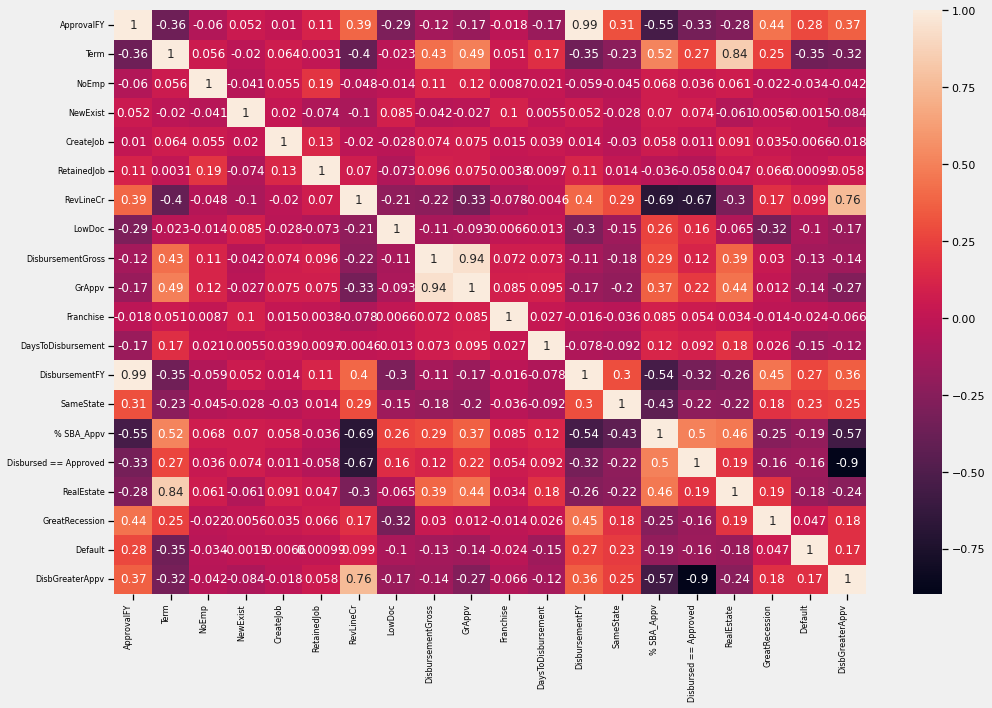

In [41]:
# Correlation Matrix
fig, ax = plt.subplots(figsize = (15, 10))
correlation_matrix = loans.corr()
ax = sns.heatmap(correlation_matrix, annot = True)
plt.xticks(rotation = 90, horizontalalignment = 'right', fontsize=8)
plt.yticks(fontsize = 8)
plt.show()

Let's create some meaningful visualizations to aid our analysis

Some of the plots that come to mind based on the feature engineering done previously are as follows:
 - Distrubution of Loans among New and Existing Business
 - Total/Average disbursed loan amount v/s Industry
 - Average days to disbursement  v/s Industry
 - Number of paid in full and defaulted loans v/s Industry
 - Number of paid in full and defaulted loans v/s DisbursementFY
 - Number of paid in full and defaulted loans v/s State
 - Percentage of defaulted loans backed by Real Estate
 - Percentage of defaulted loans active during the Great Recession

##### Distribution of Loans among New and Existing Businesses

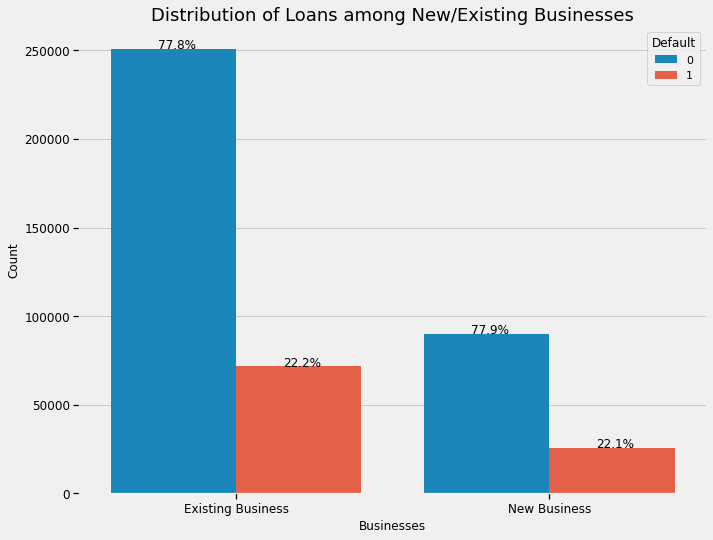

In [42]:
# Functions to add percentages on top of the bars
def bar_pct1(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j * Number_of_categories + i)]/total)
            x = patch[(j * Number_of_categories + i)].get_x() + patch[(j * Number_of_categories + i)].get_width() / 2 - 0.05
            y = patch[(j * Number_of_categories + i)].get_y() + patch[(j * Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
            
def bar_pct2(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().sort_values().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j * Number_of_categories + i)]/total)
            x = patch[(j * Number_of_categories + i)].get_x() + patch[(j * Number_of_categories + i)].get_width() / 2 - 0.05
            y = patch[(j * Number_of_categories + i)].get_y() + patch[(j * Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)

# Plotting Distrubution of Loans among New and Existing Business
plt.figure(figsize = (10, 8))
plot1 = sns.countplot(x = 'NewExist', hue = 'Default', data = loans)
labels = ('Existing Business', 'New Business')
positions = (0, 1)
plt.xticks(positions, labels, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Businesses', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Distribution of Loans among New/Existing Businesses', fontsize = 18)

bar_pct1(plot1, loans['NewExist'], 2, 2)

As mentioned earlier, approximately 74% of the businesses are existing businesses and among them 22.2% of the businesses had their loans defaulted in the time frame of the dataset. Looking at new businesses, approximately 26% of businesses are new businesses and among them 22.1% of the businesses had their loans defaulted

##### Total/Average disbursed loan amount v/s Industry

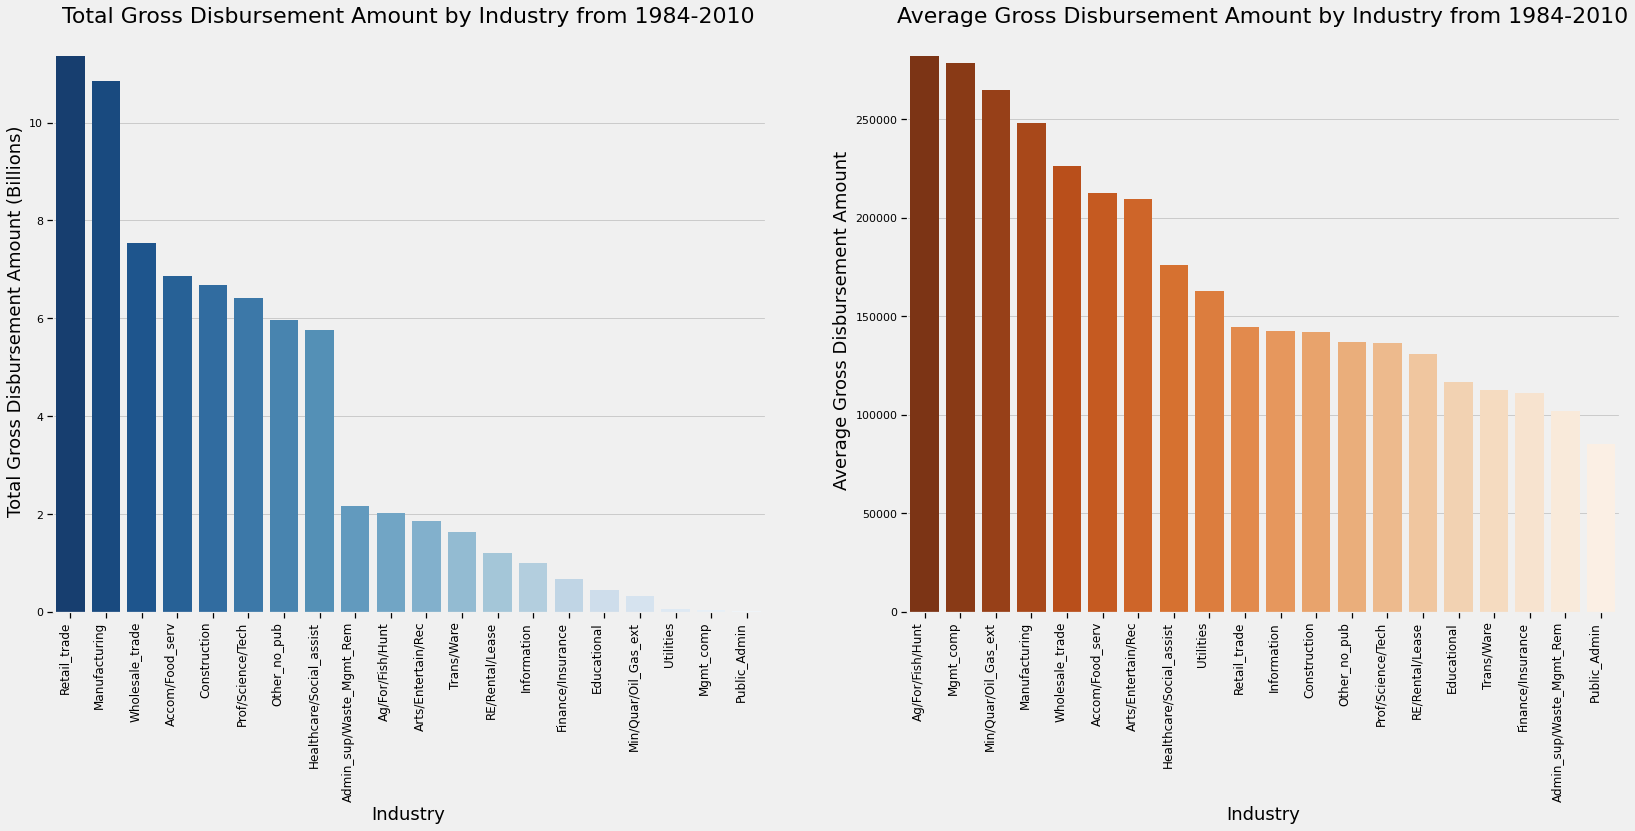

In [43]:
# Grouping by Industry and looking at the Total and Average Gross Disbursement Amount
IndustryTotal = loans.groupby(['Industry']).sum().sort_values('DisbursementGross', ascending=False)
IndustryMean = loans.groupby(['Industry']).mean().sort_values('DisbursementGross', ascending=False)

# Plotting Barplots for Total & Average Gross Disbursement Amount by Industries
fig, ax = plt.subplots(1, 2, figsize = (25, 10))

# Barplot 1 = Toatl Gross Disbursement Amount by Industry
plot2_1 = sns.barplot(IndustryTotal.index, IndustryTotal['DisbursementGross'] / (10 ** 9), palette = 'Blues_r', 
                      ax = ax[0])
ax[0].set_xticklabels(IndustryTotal.index, rotation = 90, horizontalalignment = 'right', fontsize = 12)
ax[0].set_title('Total Gross Disbursement Amount by Industry from 1984-2010', fontsize = 22)
ax[0].set_xlabel('Industry', fontsize = 18)
ax[0].set_ylabel('Total Gross Disbursement Amount (Billions)', fontsize = 18)

# Barplot 2 = Average Gross Disbursement Amount by Industry
plot2_2 = sns.barplot(IndustryMean.index, IndustryMean['DisbursementGross'], palette = 'Oranges_r', ax = ax[1])
ax[1].set_xticklabels(IndustryMean.index, rotation = 90, horizontalalignment = 'right', fontsize = 12)
ax[1].set_title('Average Gross Disbursement Amount by Industry from 1984-2010', fontsize = 22)
ax[1].set_xlabel('Industry', fontsize = 18)
ax[1].set_ylabel('Average Gross Disbursement Amount', fontsize =18)

plt.show()

 - 'Retail Trade' and 'Manufacturing' Industries have relatively large amounts of loan funds disbursed to them during the time frame in comparision to other Industries
 - First plot shows that the Industries associated to 'Agriculture, forestry, fishing and hunting', 'Mining, quarrying, and oil and gas extraction' and 'Management of Companies and Enterprises' have relatively small amounts of Total loan funds disbursed to them but according to the second plot these industries have the highest average loan amount compared to other industries, this indicates they had a small number of  very large loans

##### Average Days to Disbursement v/s Industry

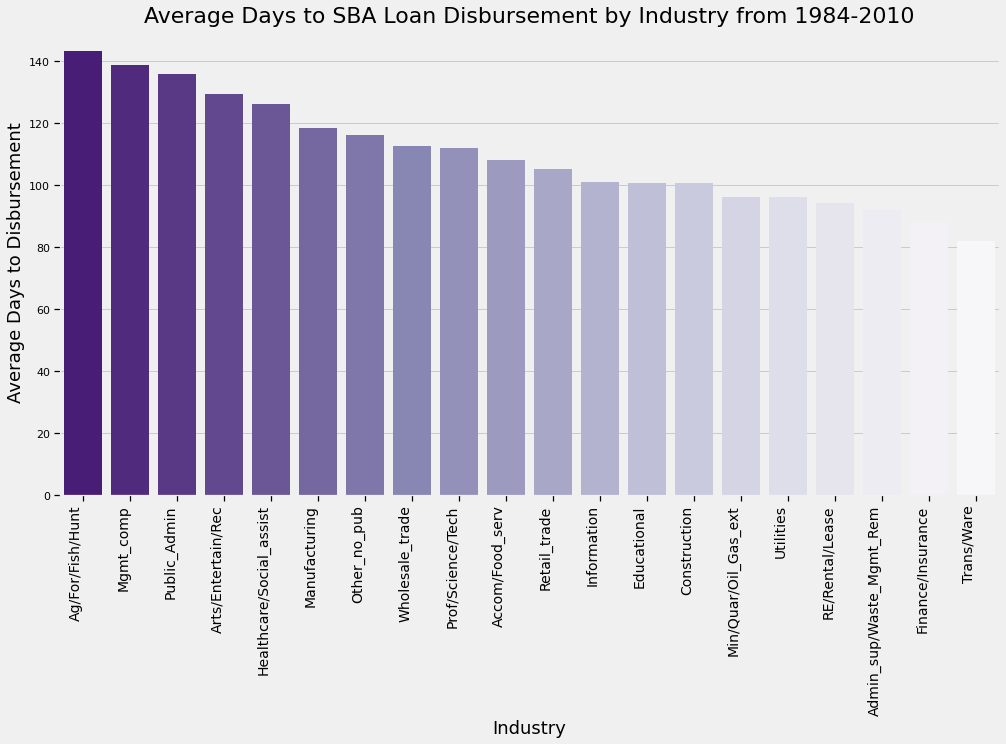

In [44]:
# Plotting Barplot for Average Days to Disbursement v/s Industry from 1984-2010
plt.figure(figsize = (15, 8))
plot3 = sns.barplot(x = IndustryMean.index, y = IndustryMean['DaysToDisbursement'].sort_values(ascending = False), 
                    palette = 'Purples_r')
plot3.set_xticklabels(IndustryMean['DaysToDisbursement'].sort_values(ascending=False).index, 
                      rotation = 90, horizontalalignment='right', fontsize = 14)
plot3.set_title('Average Days to SBA Loan Disbursement by Industry from 1984-2010', fontsize = 22)
plot3.set_xlabel('Industry', fontsize = 18)
plot3.set_ylabel('Average Days to Disbursement', fontsize = 18)
plt.show()

 - It seems that it took relatively longer to disburse loan funds to industries associated with 'Agriculture, forestry, fishing and hunting' and 'Mining, quarrying, and oil and gas extraction' sectors which justifies the previous assumption that they had a small number of very large loans, since loan application with a large amount are usually slow to process

##### Number of paid in full and defaulted loans v/s Industry

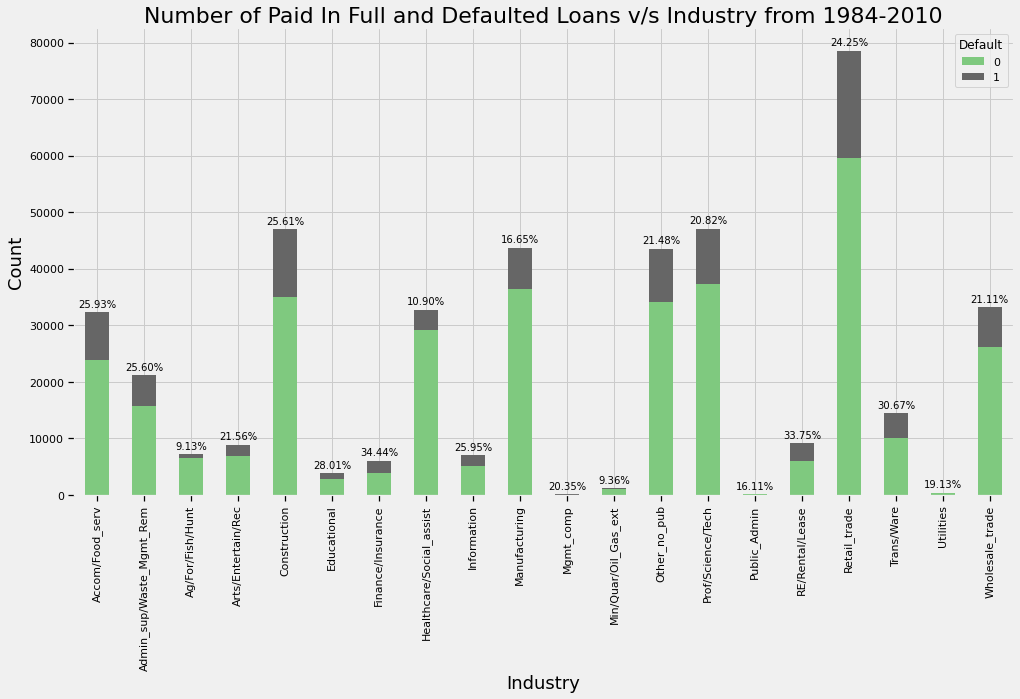

In [45]:
# Grouping by 'Default' and 'Industry' to plot a stacked barplot showing the distribution of loans
IndustryDefault = loans.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default')

# Calculating Default Rate for each Industry
Default_Pct = list((IndustryDefault[1] / (IndustryDefault[1] + IndustryDefault[0])) * 100)

# Plotting the stacked barplot
plot4 = IndustryDefault.plot(kind = 'bar', stacked = True, colormap = 'Accent', figsize = (15, 8))

# Annotating the Default Rate on top of all the bars
xy = []
for bar in plot4.patches:
    xy.append((bar.get_x() + bar.get_width() / 2, bar.get_height()))

xy = np.array(xy)
xy = xy[0:20, :] + xy[20:40, :]
xy[:, 0] = xy[:, 0] / 2
    
for i in range(len(Default_Pct)):
    plot4.annotate(str(format(Default_Pct[i], '.2f'))+'%', xy[i], ha = 'center', va = 'center', 
                   size = 10, xytext = (0, 8), textcoords = 'offset points')

plt.title('Number of Paid In Full and Defaulted Loans v/s Industry from 1984-2010', fontsize = 22)
plt.ylabel('Count', fontsize = 18)
plt.xlabel('Industry', fontsize = 18)
plt.show()

 - Industries with the highest number of loans during the time frame: Retail trade (78,554), Professional, scientific and technical services (47,081) and Construction (47,047)
 - Industries with the highest Default Rate: Finance and Insurance (34.44%), Real Estate and rental leasing (33.75%) and Transportation and warehousing (30.67%)

##### Number of Paid In Full and Defaulted loans by State

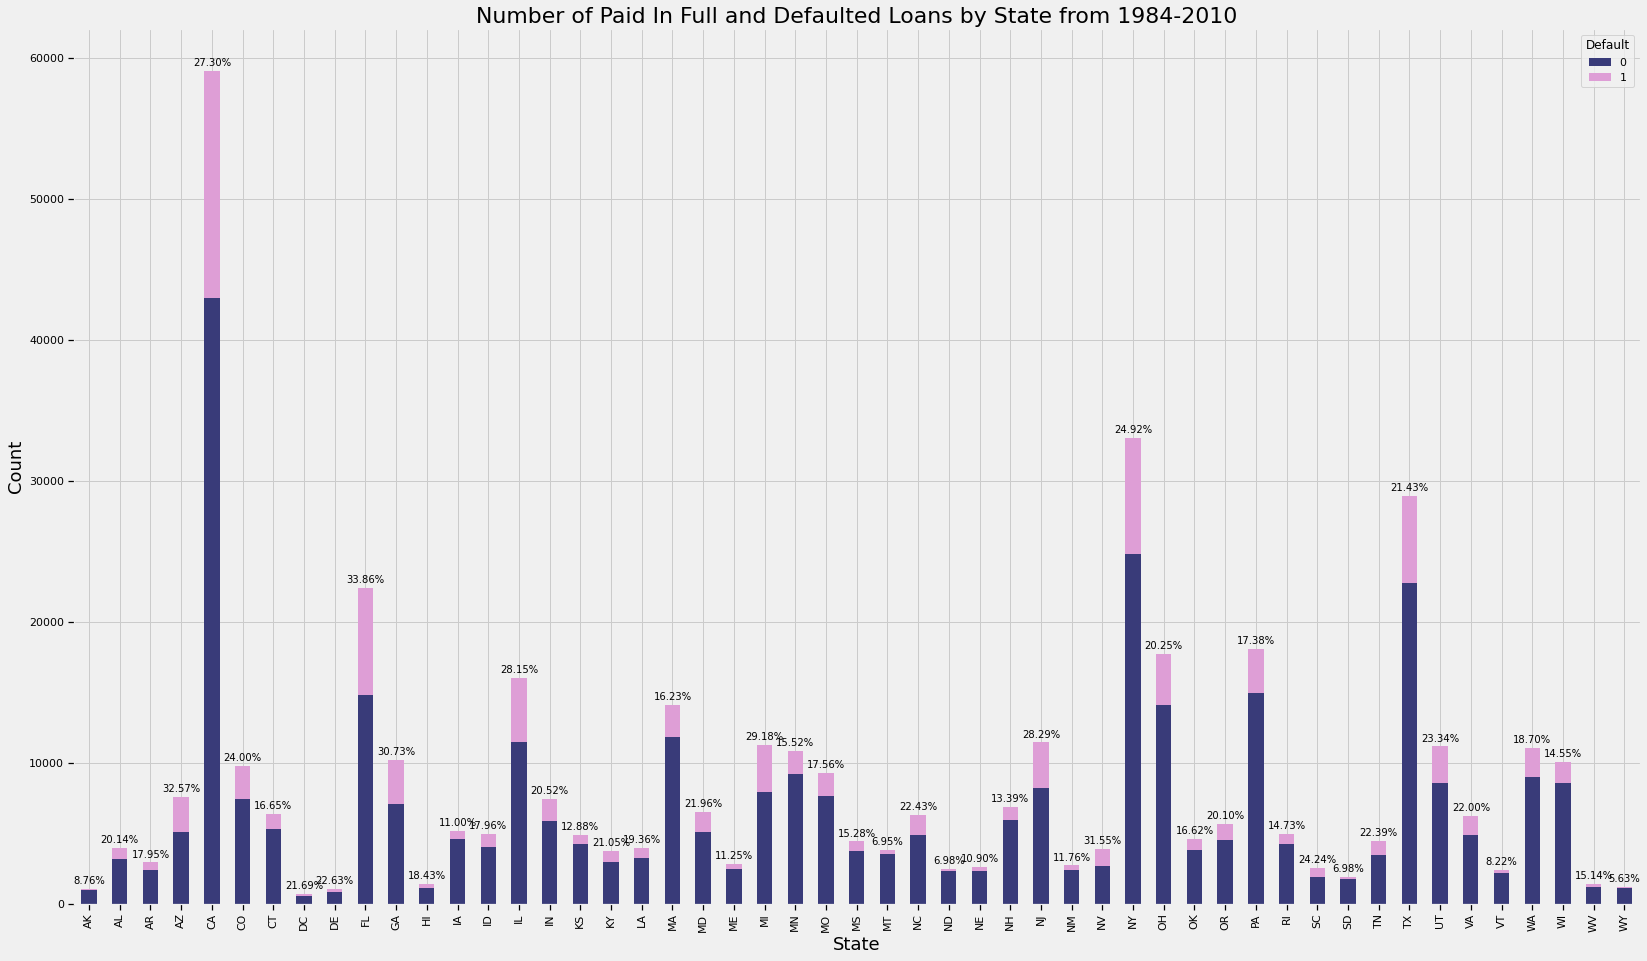

In [46]:
# Grouping by 'Default' and 'State' to plot a stacked barplot showing the distribution of loans
StateDefault = loans.groupby(['State', 'Default'])['State'].count().unstack('Default')

# Calculating Default Rate for each State
Default_Pct = list((StateDefault[1] / (StateDefault[1] + StateDefault[0])) * 100)

# Plotting the stacked barplot
plot5 = StateDefault.plot(kind = 'bar', stacked = True, colormap = 'tab20b', figsize = (25, 15))

# Annotating the Default Rate on top of all the bars
xy = []
for bar in plot5.patches:
    xy.append((bar.get_x() + bar.get_width() / 2, bar.get_height()))

xy = np.array(xy)
xy = xy[0:51, :] + xy[51:102, :]
xy[:, 0] = xy[:, 0] / 2
    
for i in range(len(Default_Pct)):
    plot5.annotate(str(format(Default_Pct[i], '.2f'))+'%', xy[i], ha = 'center', va = 'center', 
                   size = 10, xytext = (0, 8), textcoords = 'offset points')

plt.title('Number of Paid In Full and Defaulted Loans by State from 1984-2010', fontsize = 22)
plt.ylabel('Count', fontsize = 18)
plt.xlabel('State', fontsize = 18)
plt.show()

In [47]:
pip install plotly-express

Note: you may need to restart the kernel to use updated packages.


In [48]:
# Chloropleth Map for loan density across states
import plotly.express as px

StateDefault['Total'] = StateDefault[0] +  StateDefault[1]
plot6 = px.choropleth(StateDefault, locations = StateDefault.index, locationmode = "USA-states", scope = "usa", 
                      color = 'Total', color_continuous_scale = "Viridis_r")

plot6.update_layout(title_text = 'States shaded by # of loans disbursed from 1984-2010',
                    title_font_family = "Times New Roman",
                    title_font_size = 22,
                    title_font_color = "black", 
                    title_x = 0.45)

plot6.show()

In [49]:
# Chloropleth Map for Default Rate across States
StateDefault['Default Rate %'] = (StateDefault[1] /  StateDefault['Total']) * 100
plot6 = px.choropleth(StateDefault, locations = StateDefault.index, locationmode = 'USA-states', scope = 'usa', 
                      color = 'Default Rate %', color_continuous_scale = 'rdbu_r')

plot6.update_layout(title_text = 'States shaded by Default Rates(%) disbursed from 1984-2010',
                    title_font_family = 'Times New Roman',
                    title_font_size = 22,
                    title_font_color = 'black', 
                    title_x = 0.45)
plot6.show()

 - States with the highest number of loans during sample period: California (59,121), New York (33,059) and Texas (28,941)
 - State with the highest Default Rate: Florida (33.86%), Arizona (32.57%) and Nevada (31.55%)

##### Number of paid in full and defaulted loans v/s DisbursementFY

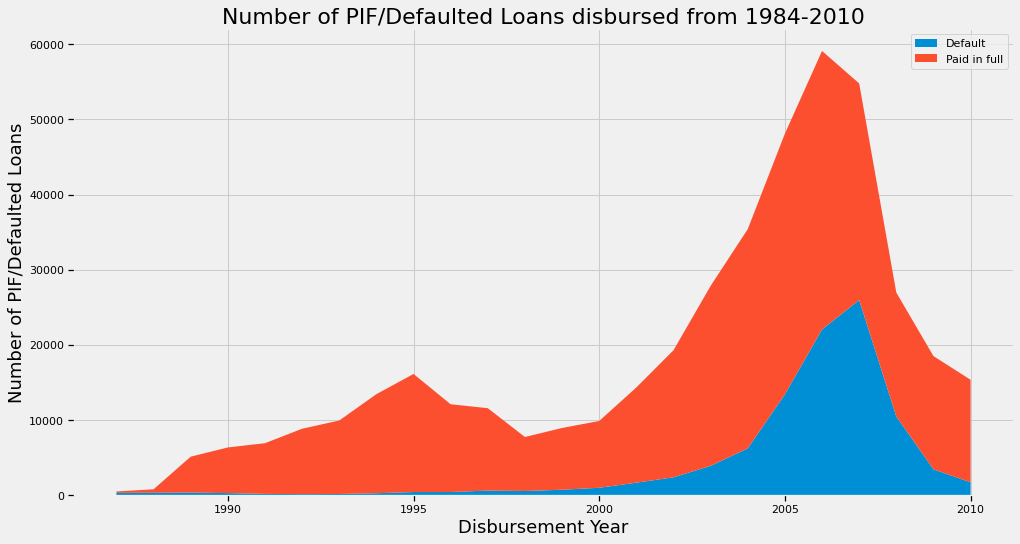

In [50]:
# Grouping by 'DisbursementFY' and 'Default'
StackedData = loans.groupby(['DisbursementFY', 'Default'])['DisbursementFY'].count().unstack('Default')

x = StackedData.index
y = [StackedData[1], StackedData[0]]

plt.figure(figsize = (15, 8))

plot7 = plt.stackplot(x, y, labels = ['Default', 'Paid in full'])

plt.title('Number of PIF/Defaulted Loans disbursed from 1984-2010', fontsize = 22)
plt.xlabel('Disbursement Year', fontsize = 18)
plt.ylabel('Number of PIF/Defaulted Loans', fontsize = 18)
plt.legend(loc = 'best')
plt.show()

There is a clear increase in loan volume leading up to the peak of the Great Recession, with a subsequent drop in loan volume immediately following that time. Looking at the graph, it appears the default rate of loans increased during that time as well.

##### Percentage of defaulted loans backed by 'Real Estate' & Percentage of defaulted loans active during the 'Great Recession'

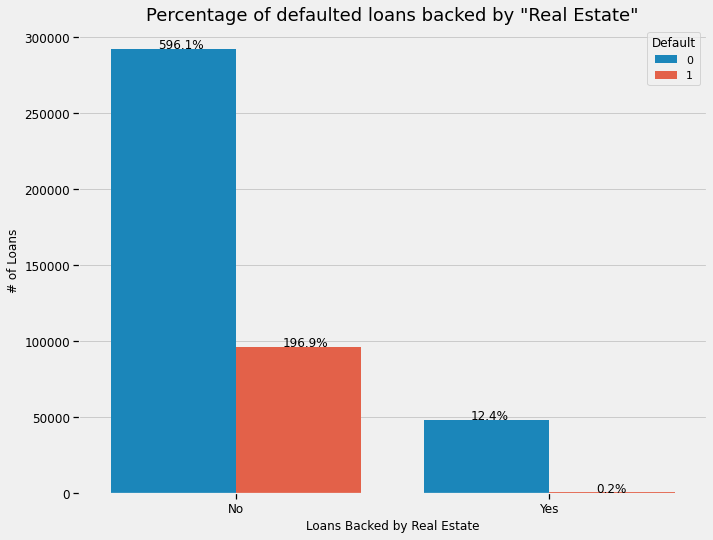

In [51]:
# Plotting Distrubution of Loans backed by Real Estate
plt.figure(figsize = (10, 8))
plot8 = sns.countplot(x = 'RealEstate', hue = 'Default', data = loans)
labels = ('No', 'Yes')
positions = (0, 1)
plt.xticks(positions, labels, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Loans Backed by Real Estate', fontsize = 12)
plt.ylabel('# of Loans', fontsize = 12)
plt.title('Percentage of defaulted loans backed by "Real Estate"', fontsize = 18)

bar_pct2(plot8, loans['RealEstate'], 2, 2)

The volume of loans backed by real estate was much less than those not backed by real estate which makes sense that most people aren't willing to take on that much risk, however the default rate is also much less for loans backed by real estate  (1.4%). This is likely because the people and businesses who have their loans backed by real estate are much more established players so they're more willing to do what it takes to pay the debt.

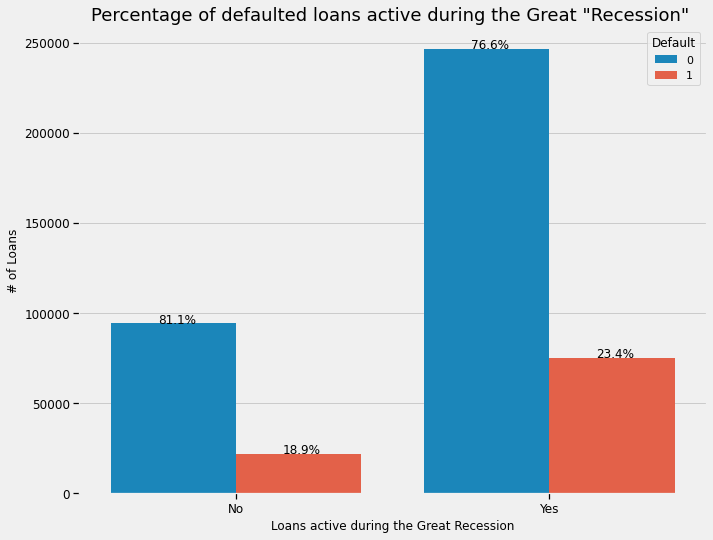

In [52]:
# Plotting Loans active during the Great Recession
plt.figure(figsize = (10, 8))
plot9 = sns.countplot(x = 'GreatRecession', hue = 'Default', data = loans)
labels = ('No', 'Yes')
positions = (0, 1)
plt.xticks(positions, labels, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Loans active during the Great Recession', fontsize = 12)
plt.ylabel('# of Loans', fontsize = 12)
plt.title('Percentage of defaulted loans active during the Great "Recession" ', fontsize = 18)

bar_pct2(plot9, loans['GreatRecession'], 2, 2)

The assumption was that loans active during the Great Recession would have a noticeably higher Default Rate than those not active during that time. After looking at this plot it seems that this difference would be more apparent if the focus was on loans disbursed in the few years leading up to the Great Recession, maybe beginning in 2004 or 2005

Let's checkout the features and their data types so far

In [53]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438090 entries, 0 to 899161
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   State                  438090 non-null  object 
 1   BankState              438090 non-null  object 
 2   ApprovalFY             438090 non-null  int64  
 3   Term                   438090 non-null  int64  
 4   NoEmp                  438090 non-null  int64  
 5   NewExist               438090 non-null  int64  
 6   CreateJob              438090 non-null  int64  
 7   RetainedJob            438090 non-null  int64  
 8   UrbanRural             438090 non-null  object 
 9   RevLineCr              438090 non-null  int64  
 10  LowDoc                 438090 non-null  int64  
 11  DisbursementGross      438090 non-null  float64
 12  GrAppv                 438090 non-null  float64
 13  Industry               438090 non-null  object 
 14  Franchise              438090 non-nu

In [54]:
# Checking Class Imbalance
loans['Default'].value_counts()

0    340817
1     97273
Name: Default, dtype: int64

In [55]:
# Creating a checkpoint
loans.to_csv('LoanClassification.csv')

Since, there are categorical features in the dataset let's apply one-hot encoding to our dataset

In [56]:
# One-Hot Encoding
loans = pd.get_dummies(loans)

loans.shape

(438090, 147)

### Modelling

First let's import necessary modules and libraries needed for modelling

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

Next let's split our dataset in to training, validation and test sets

In [58]:
# Splitting the dataset
features = loans.drop(columns = ['Default'])
target = loans['Default']

# Splitting for test
X, X_test, y, y_test = train_test_split(features, target, test_size = 0.15, random_state = 0)

# Splitting for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = (0.15/0.85), random_state = 0)

print(loans.shape, '\n')
print(X_train.shape, y_train.shape, '\n')
print(X_val.shape, y_val.shape, '\n')
print(X_test.shape, y_test.shape, '\n')

(438090, 147) 

(306662, 146) (306662,) 

(65714, 146) (65714,) 

(65714, 146) (65714,) 



##### Standardization
It's usually a good practice to <b>standardize</b> the training set then scale the validation and test sets according to the scalers used to standardize the training set, to prevent leakage

In [59]:
# Fitting StandardScaler to X_train then transforming X_train, X_val and X_test based on the scalers of X_train
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [60]:
# Converting train, val and test back to pandas DataFrames
X_train = pd.DataFrame(data = X_train, columns = features.columns)
X_val = pd.DataFrame(data = X_val, columns = features.columns)
X_test = pd.DataFrame(data = X_test, columns = features.columns)

After exploratory data analysis, let's experiment with modelling. Since, the task at hand is <b>binary classification</b>, the first model that comes to mind is a <b>Logistic Regression</b> model, so let's build a Logistic Regression Model

#### Logistic Regression

In [61]:
# Fitting LogisticRegression model to X_train
LogReg = LogisticRegression(random_state = 0).fit(X_train.to_numpy(), y_train.to_numpy().reshape(-1, 1))

# Predicting on X_train and X_val
y_train_pred = LogReg.predict(X_train.to_numpy())
y_val_pred = LogReg.predict(X_val.to_numpy())

In this analysis, it's better if it's predicted that a loan defaults and it doesn't than if it's predicted a loan will be paid in full and ends up in default. In other words, it is desired that the model minimizes the number of false negatives (since a 1 in the Default column signifies a 'positive' value in this case). Essentially a model that predicts the correct outcome most of the time, but when it gets it wrong it's not as bad. Hence, performance metrics like precision, recall, F1-score need to be considered, moreover the focus should be on maximizing recall as it is desired to minimize false negatives.

Precision attempts to answer what proportion of positive predictions was actually correct, whereas Recall attempts to answer what proportion of actual positives was predicted correctly. The F1-score is a weighted average of precision and recall. General accuracy therefore is better if the outcomes have similar costs, however F1-score should be relied on more heavily if the outcomes have different costs as is the case in this scenario. So let's checkout these metrics for the predictions made above

Training Accuracy:  0.8757818053752991
Training Precision Score:  0.783689538807649
Training Recall Score:  0.6115247889755255
Training F1-Score:  0.6869848886989819


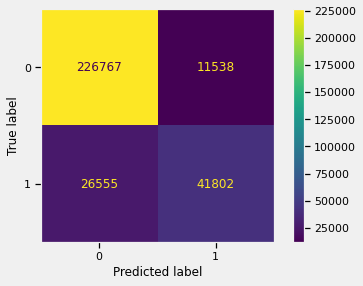

In [62]:
# Performance Metrics for the Training Set
print('Training Accuracy: ', accuracy_score(y_train.to_numpy().reshape(-1, 1), y_train_pred))
print('Training Precision Score: ', precision_score(y_train.to_numpy().reshape(-1, 1), y_train_pred))
print('Training Recall Score: ', recall_score(y_train.to_numpy().reshape(-1, 1), y_train_pred))
print('Training F1-Score: ', f1_score(y_train.to_numpy().reshape(-1, 1), y_train_pred))
plot10 = plot_confusion_matrix(LogReg, X_train.to_numpy(), y_train.to_numpy().reshape(-1, 1))
plt.grid(False)
plt.show()

Validation Accuracy:  0.8770429436649725
Validation Precision Score:  0.7838557854542225
Validation Recall Score:  0.6098942859116977
Validation F1-Score:  0.6860184969301315


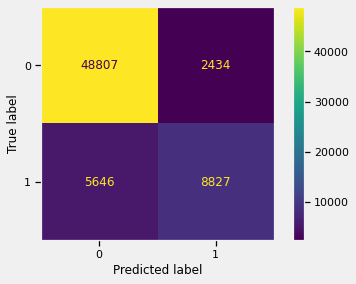

In [63]:
# Performance Metrics for the Validation Set
print('Validation Accuracy: ', accuracy_score(y_val.to_numpy().reshape(-1, 1), y_val_pred))
print('Validation Precision Score: ', precision_score(y_val.to_numpy().reshape(-1, 1), y_val_pred))
print('Validation Recall Score: ', recall_score(y_val.to_numpy().reshape(-1, 1), y_val_pred))
print('Validation F1-Score: ', f1_score(y_val.to_numpy().reshape(-1, 1), y_val_pred))
plot11 = plot_confusion_matrix(LogReg, X_val.to_numpy(), y_val.to_numpy().reshape(-1, 1))
plt.grid(False)
plt.show()

Let's make a baseline model which predicts that every loan will default to set a standard for other models, later performance metrics of different models can be compared to this

In [64]:
# Creating three target arrays with only '1's with the same shape as y_train, y_val and y_test
y_train_base = np.ones(y_train.to_numpy().reshape(-1, 1).shape)
y_val_base = np.ones(y_val.to_numpy().reshape(-1, 1).shape)

# Performance Metrics
print('Baseline Training Accuracy: ', accuracy_score(y_train.to_numpy().reshape(-1, 1), y_train_base))
print('Baseline Training Precision Score: ', precision_score(y_train.to_numpy().reshape(-1, 1), y_train_base))
print('Baseline Training Recall Score: ', recall_score(y_train.to_numpy().reshape(-1, 1), y_train_base))
print('Baseline Training F1-Score: ', f1_score(y_train.to_numpy().reshape(-1, 1), y_train_base))
print('\n')
print('Baseline Validation Accuracy: ', accuracy_score(y_val.to_numpy().reshape(-1, 1), y_val_base))
print('Baseline Validation Precision Score: ', precision_score(y_val.to_numpy().reshape(-1, 1), y_val_base))
print('Baseline Validation Recall Score: ', recall_score(y_val.to_numpy().reshape(-1, 1), y_val_base))
print('Baseline Validation F1-Score: ', f1_score(y_val.to_numpy().reshape(-1, 1), y_val_base))

Baseline Training Accuracy:  0.22290665292732714
Baseline Training Precision Score:  0.22290665292732714
Baseline Training Recall Score:  1.0
Baseline Training F1-Score:  0.3645521960220682


Baseline Validation Accuracy:  0.22024226192287794
Baseline Validation Precision Score:  0.22024226192287794
Baseline Validation Recall Score:  1.0
Baseline Validation F1-Score:  0.36098120642996995


For the Recall Score of the Baseline Model is expected to be 1 as all loans have been classified as default and as expected the other metrics have very poor values, compared to the baseline model, the logistic regression model does improve the metrics. There is a noticeable difference between the F1-Scores but for the LogReg Model an F1-Score of ~69% is not that great. Looking at accuracy, an accuracy of ~87% is good but since it is desired to minimize <b>false negatives</b> the LogReg model doesn't perform upto expectations. From the confusion matrix we can see that the percentage of false negatives for default loans is (26555/68357)x100 = ~39% this means that 39% of loans that defaulted were misclassified as loans that would be paid in full, which is not very good.

For the validation set the metrics are almost comparable to the training set which means the model is not overfitting.  From the confusion matrix we can see that the percentage of false negatives for default loans is (5646/14473)x100 = ~39% this means that 39% of loans that defaulted were misclassified as loans that would be paid in full, which is not very good.

The probability threshold for classification is by default 0.5, this value can be played around to maximize our metrics. Next let's sweep through different probability threshold values and report the metrics

In [65]:
#Creating dicts to store metrics with threshold value as key
Accuracy_arr = {}
Precision_arr = {}
Recall_arr = {}
F1_Score_arr = {}

# Getting probabilities for each class for every entry
y_train_pred_proba = LogReg.predict_proba(X_train.to_numpy())

# Sweeping through different thresholds and calculating the metrics
for i in np.linspace(0.05, 0.95, 19, endpoint = True):
    y_train_pred = (y_train_pred_proba >= i).astype('int64')[:, 1]
    Accuracy_arr[i] = accuracy_score(y_train.to_numpy().reshape(-1,1), y_train_pred)
    Precision_arr[i] = precision_score(y_train.to_numpy().reshape(-1,1), y_train_pred)
    Recall_arr[i] = recall_score(y_train.to_numpy().reshape(-1,1), y_train_pred)
    F1_Score_arr[i] = f1_score(y_train.to_numpy().reshape(-1,1), y_train_pred)

In [66]:
# Reporting the metrics for every threshold value
metrics_df = pd.DataFrame()
metrics_df['threshold'] = np.linspace(0.05, 0.95, 19, endpoint = True)
metrics_df['Accuracy'] = Accuracy_arr.values()
metrics_df['Precision'] = Precision_arr.values()
metrics_df['Recall'] = Recall_arr.values()
metrics_df['F1 Score'] = F1_Score_arr.values()
metrics_df

threshold  Accuracy  Precision    Recall  F1 Score
0        0.05  0.557379   0.329236  0.950203  0.489028
1        0.10  0.667778   0.395273  0.925479  0.553952
2        0.15  0.743982   0.461851  0.899162  0.610249
3        0.20  0.797455   0.527761  0.868265  0.656487
4        0.25  0.833647   0.589722  0.833799  0.690835
5        0.30  0.856829   0.644686  0.796934  0.712771
6        0.35  0.870199   0.690540  0.756879  0.722189
7        0.40  0.875707   0.725561  0.711529  0.718477
8        0.45  0.877748   0.757470  0.664233  0.707794
9        0.50  0.875782   0.783690  0.611525  0.686985
10       0.55  0.870186   0.804039  0.552218  0.654750
11       0.60  0.862236   0.820683  0.488758  0.612651
12       0.65  0.852512   0.835500  0.421288  0.560136
13       0.70  0.841572   0.851971  0.350089  0.496257
14       0.75  0.828225   0.863839  0.272306  0.414082
15       0.80  0.814307   0.876286  0.194391  0.318195
16       0.85  0.799643   0.878987  0.117311  0.206995
17       0.90  0.786974   0.873337  0.051845  0.097880
18       0.95  0.778955   0.858218  0.010006  0.019782

It seems that the maximum Recall score with a good F1 Score that could be achieved by tuning the threshold values is ~79.7%, let's check the confusion matrix for that threshold (0.3)

Training Accuracy:  0.8568293430552204
Training Precision Score:  0.6446863905325444
Training Recall Score:  0.7969337448981084
Training F1-Score:  0.7127707595988407


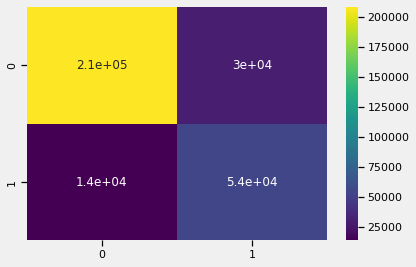

In [67]:
# Applying the probability threshold to Training Predictions
y_train_pred = (y_train_pred_proba >= 0.3).astype('int64')[:, 1]

# Performance Metrics
print('Training Accuracy: ', accuracy_score(y_train.to_numpy().reshape(-1, 1), y_train_pred))
print('Training Precision Score: ', precision_score(y_train.to_numpy().reshape(-1, 1), y_train_pred))
print('Training Recall Score: ', recall_score(y_train.to_numpy().reshape(-1, 1), y_train_pred))
print('Training F1-Score: ', f1_score(y_train.to_numpy().reshape(-1, 1), y_train_pred))
con_mat = confusion_matrix(y_train.to_numpy().reshape(-1, 1), y_train_pred)
con_mat = pd.DataFrame(data = con_mat, index = [0, 1], columns = [0, 1])
plot12 = sns.heatmap(con_mat, annot = True, cmap = 'viridis')

This means that a Logistic Regression Model with probability threshold of 0.3 results in a ~20.3% false negative percentage which is an improvement from the previous stat of ~39%. Let's checkout the metrics for Validation set as well

Validation Accuracy:  0.8579602520010956
Validation Precision Score:  0.6431556075547384
Validation Recall Score:  0.797623160367581
Validation F1-Score:  0.7121090617481958


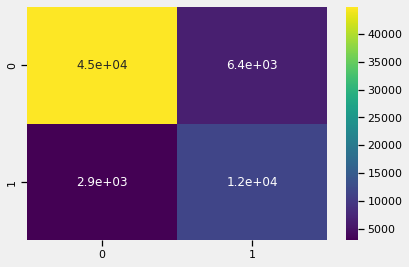

In [68]:
# Applying the probability threshold to Validation set predictions
y_val_pred_proba = LogReg.predict_proba(X_val.to_numpy())
y_val_pred = (y_val_pred_proba >= 0.3).astype('int64')[:, 1]

# Performance Metrics
print('Validation Accuracy: ', accuracy_score(y_val.to_numpy().reshape(-1, 1), y_val_pred))
print('Validation Precision Score: ', precision_score(y_val.to_numpy().reshape(-1, 1), y_val_pred))
print('Validation Recall Score: ', recall_score(y_val.to_numpy().reshape(-1, 1), y_val_pred))
print('Validation F1-Score: ', f1_score(y_val.to_numpy().reshape(-1, 1), y_val_pred))

con_mat = confusion_matrix(y_val.to_numpy().reshape(-1, 1), y_val_pred)
con_mat = pd.DataFrame(data = con_mat, index = [0, 1], columns = [0, 1])
plot13 = sns.heatmap(con_mat, annot = True, cmap = 'viridis')

Let's explore some other ways to improve our model, 